# Co-occurance marix

In [166]:
import re
import numpy as np
from mightypy.ml.utils import moving_window_matrix

In [177]:
strings = "I like deep learning. \nI like NLP. \nI enjoy flying."

p_str= '[a-zA-Z]{1,}|[.]'
pattern = re.compile(p_str, re.M)
groups = re.findall(pattern,strings)
groups

['I',
 'like',
 'deep',
 'learning',
 '.',
 'I',
 'like',
 'NLP',
 '.',
 'I',
 'enjoy',
 'flying',
 '.']

In [178]:
words = list(set(groups))
bow = dict(zip(words,range(len(groups))))

bow

{'.': 0,
 'flying': 1,
 'like': 2,
 'NLP': 3,
 'enjoy': 4,
 'deep': 5,
 'I': 6,
 'learning': 7}

In [170]:
n_tokens = len(bow)
mat = np.zeros((n_tokens,n_tokens))

In [171]:
bi_grams = moving_window_matrix(np.array(groups),2)

In [179]:
for i in bi_grams:
    x = bow[i[0]]
    y = bow[i[1]]
    
    mat[x,y] += 1
    mat[y,x] += 1

In [180]:
mat

array([[0., 2., 0., 2., 0., 0., 4., 2.],
       [2., 0., 0., 0., 2., 0., 0., 0.],
       [0., 0., 0., 2., 0., 2., 4., 0.],
       [2., 0., 2., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 0., 2., 0.],
       [0., 0., 2., 0., 0., 0., 0., 2.],
       [4., 0., 4., 0., 2., 0., 0., 0.],
       [2., 0., 0., 0., 0., 2., 0., 0.]])

In [181]:

import pandas as pd
df = pd.DataFrame(mat,columns=bow.keys())
df['words'] = bow.keys()
df

,.,flying,like,NLP,enjoy,deep,I,learning,words
0,0.0,2.0,0.0,2.0,0.0,0.0,4.0,2.0,.
1,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,flying
2,0.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,like
3,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,NLP
4,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,enjoy
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,deep
6,4.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,I
7,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,learning


In [182]:
u,s,vT = np.linalg.svd(mat, full_matrices=False)

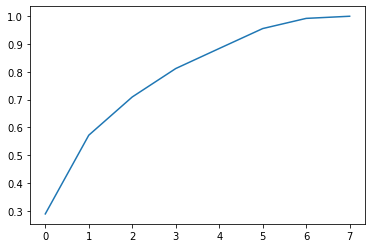

In [183]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(s)/np.sum(s))

In [196]:
r = 3
pc = u[:,:r] @ np.diag(s)[:r,:r]
pc

array([[-3.61166082,  3.58573288, -1.1523641 ],
       [-1.4303155 , -1.46998119,  0.88956895],
       [-3.19058718,  3.11822688,  1.54818131],
       [-1.88241182, -1.89469824, -0.23020427],
       [-1.55690041,  1.61546197, -0.37717613],
       [-1.25569293, -0.64651116, -1.94967386],
       [-4.19567058, -4.2459644 , -0.24104578],
       [-1.34696122, -0.83069386,  1.80412165]])

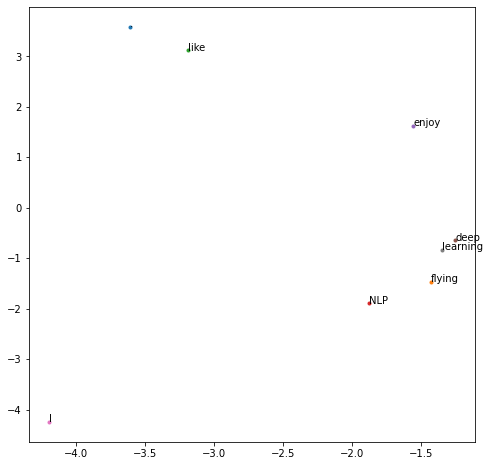

In [197]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
for i in range(n_tokens):
    ax.scatter(pc[i,0],pc[i,1],marker='.')
    ax.text(pc[i,0],pc[i,1],words[i])

plt.show()